In [15]:
import pickle 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# ファイル読み込み
with open('../../data/Hazumi1911/Hazumi1911_features/Hazumi1911_features.pkl', mode='rb') as f:
    videoIDs, videoSentiment, videoPersona, videoText, videoAudio,\
    videoVisual, videoSentence, Vid = pickle.load(f, encoding='utf-8')

## 標準化なし

In [24]:
df = pd.DataFrame.from_dict(videoPersona, orient="index", columns=['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'])

model = KMeans(n_clusters=3, random_state=1)
model.fit(df)
cluster = model.labels_

df['cluster'] = cluster 
print(df['cluster'].value_counts())
df

0    13
2     9
1     4
Name: cluster, dtype: int64


,extraversion,agreauleness,conscientiousness,neuroticism,openness,cluster
1911F2001,12.4,12.4,6.6,8.4,9.8,2
1911F2002,10.4,11.2,8.0,6.8,7.2,2
1911F3001,7.2,13.2,11.0,5.2,8.6,0
1911F3002,6.4,9.6,9.0,6.8,9.8,1
1911F3003,8.0,12.0,11.2,5.8,8.4,0
1911F4001,11.0,12.6,10.4,4.6,9.8,0
1911F4002,12.4,10.2,9.6,5.2,11.0,2
1911F4003,12.8,12.4,9.4,5.2,10.2,2
1911F5001,11.0,13.4,11.0,4.2,10.2,0
1911F5002,9.6,10.2,10.6,4.8,8.4,0


/tmp/ipykernel_6456/710670319.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_6456/710670319.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_6456/710670319.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
/tmp/ipykernel_6456/710670319.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)


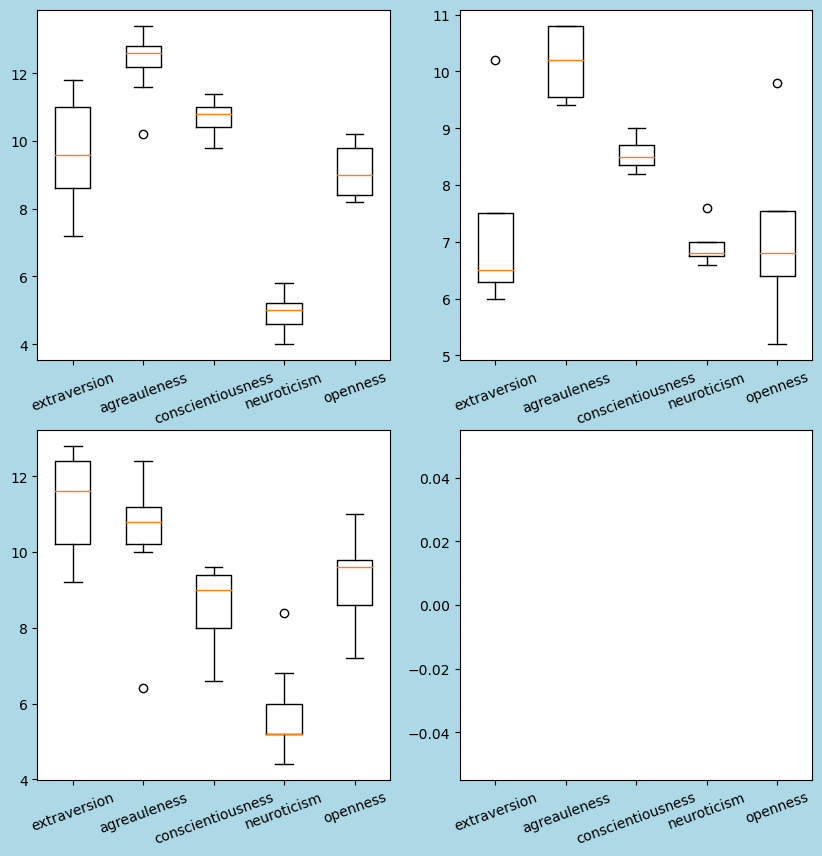

In [25]:
df0 = df[df['cluster']==0].iloc[:,:-1]
df1 = df[df['cluster']==1].iloc[:,:-1]
df2 = df[df['cluster']==2].iloc[:,:-1]
df3 = df[df['cluster']==3].iloc[:,:-1]


fig = plt.figure(figsize=(10,10), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)

ax1.boxplot(df0)
ax2.boxplot(df1)
ax3.boxplot(df2)
ax4.boxplot(df3)

plt.show()

## 標準化あり

In [ ]:
df_sc = pd.DataFrame.from_dict(videoPersona, orient="index", columns=['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'])
sc = StandardScaler()
df_sc = sc.fit_transform(df_sc)
df_sc = pd.DataFrame(df_sc, columns=df.columns)
model = KMeans(n_clusters=4, random_state=1)
model.fit(df_sc)
cluster = model.labels_

df_sc['cluster'] = cluster 
print(df_sc['cluster'].value_counts())
df_sc

In [ ]:
df0 = df_sc[df_sc['cluster']==0].iloc[:,:-1]
df1 = df_sc[df_sc['cluster']==1].iloc[:,:-1]
df2 = df_sc[df_sc['cluster']==2].iloc[:,:-1]
df3 = df_sc[df_sc['cluster']==3].iloc[:,:-1]


fig = plt.figure(figsize=(10,10), facecolor='lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax2.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax3.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)
ax4.set_xticklabels(['extraversion', 'agreauleness', 'conscientiousness', 'neuroticism', 'openness'], rotation=20)

ax1.boxplot(df0)
ax2.boxplot(df1)
ax3.boxplot(df2)
ax4.boxplot(df3)

plt.show()

## クラスタ数の決定

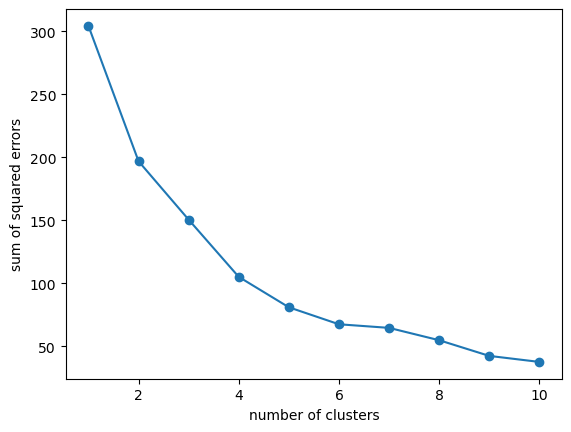

In [19]:
# エルボー法を実行
sum_of_squared_errors = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=0, init='random')
    model.fit(df)
    sum_of_squared_errors.append(model.inertia_)  # 損失関数の値を保存

plt.plot(range(1, 11), sum_of_squared_errors, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('sum of squared errors')
plt.show()

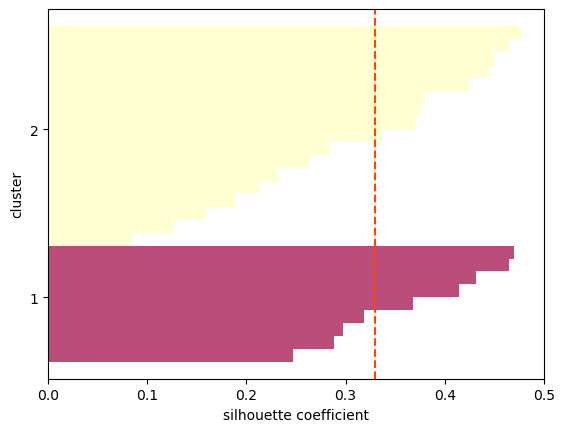

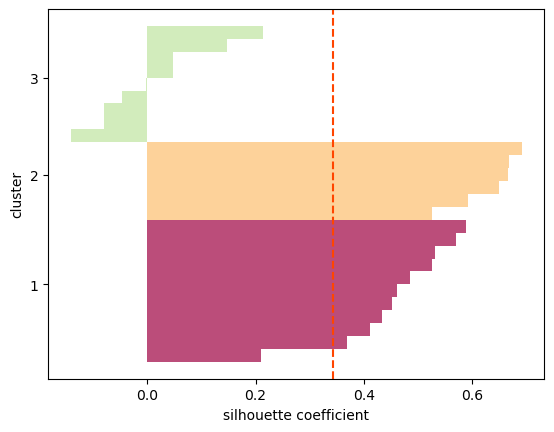

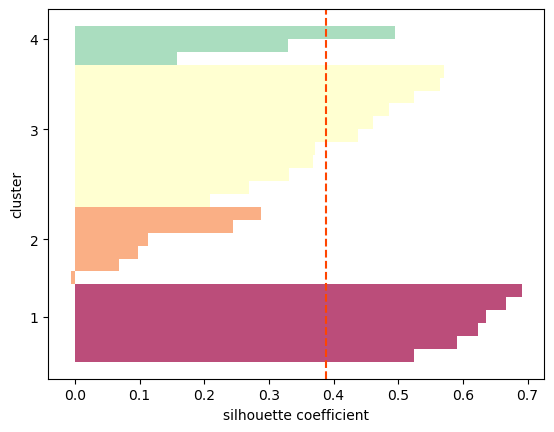

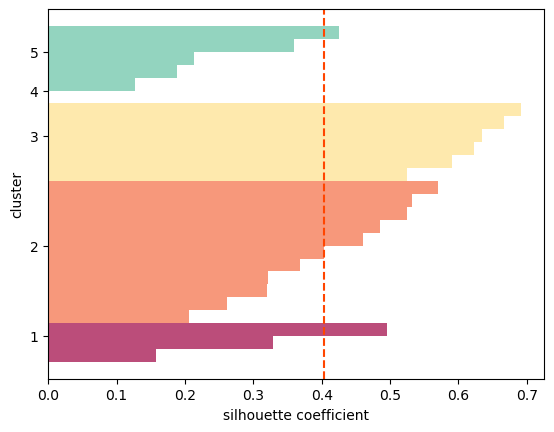

In [22]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def show_silhouette(fitted_model):
    cluster_labels = np.unique(fitted_model.labels_)
    num_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(df, fitted_model.labels_)  # シルエット係数の計算
    # 可視化
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for idx, cls in enumerate(cluster_labels):
        cls_silhouette_vals = silhouette_vals[fitted_model.labels_==cls]
        cls_silhouette_vals.sort()
        y_ax_upper += len(cls_silhouette_vals)
        cmap = cm.get_cmap("Spectral")
        rgba = list(cmap(idx/num_clusters))  # rgbaの配列
        rgba[-1] = 0.7  # alpha値を0.7にする
        plt.barh(
            y=range(y_ax_lower, y_ax_upper), 
            width=cls_silhouette_vals,
            height=1.0,
            edgecolor='none',
            color=rgba)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.0)
        y_ax_lower += len(cls_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color='orangered', linestyle='--')
    plt.xlabel('silhouette coefficient')
    plt.ylabel('cluster')
    plt.yticks(y_ticks, cluster_labels + 1)
    plt.show()


for i in range(2, 6):
    model = KMeans(n_clusters=i, random_state=0, init='random')
    model.fit(df)
    show_silhouette(model)